In [1]:
data weights;
   input rat s1 s2 s3 s4 s5;
   datalines;
1  145 199 249 293 354
2  147 214 263 312 328
3  155 200 237 272 297
4  135 188 230 280 323
5  159 210 252 298 331
6  141 189 231 275 305
7  159 201 248 297 338
8  177 236 285 340 376
9  134 182 220 260 296
10 160 208 261 313 352
11 143 188 220 273 314
12 154 200 244 289 325
13 171 221 270 326 358
14 163 216 242 281 312
15 160 207 248 288 324
16 142 187 234 280 316
17 156 203 243 283 317
18 157 212 259 307 336
19 152 203 246 286 321
20 154 205 253 298 334
21 139 190 225 267 302
22 146 191 229 272 302
23 157 211 250 285 323
24 132 185 237 286 331
25 160 207 257 303 345
26 169 216 261 295 333
27 157 205 248 289 316
28 137 180 219 258 291
29 153 200 244 286 324
30 151 199 246 283 320
;

In [2]:
libname t "/folders/myfolders/Teesta/data";
proc datasets library=t;
run;

In [3]:
data t.rat_weights;
    set weights;
run;

In [15]:
proc transpose data=weights out=rats name=visit_s;
    by rat;
run;


data rats;
    set rats;
    visit=input(substr(visit_s,2,2),f2.);
    drop visit_s;
    rename col1=weight;
run;
proc print data=rats;
run;



Obs,rat,weight,visit
1,1,145,1
2,1,199,2
3,1,249,3
4,1,293,4
5,1,354,5
6,2,147,1
7,2,214,2
8,2,263,3
9,2,312,4
10,2,328,5



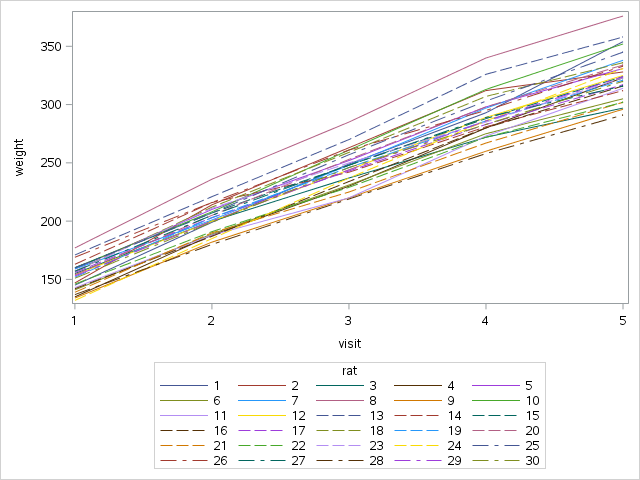

In [16]:
proc sgplot data=rats;
    series x=visit y=weight/group=rat;
run;

In [42]:
ods graphics on;
proc gee data=rats plots=all;
    class rat visit;
    model weight = visit;
    random intercept/subject=rat;
    repeated subject=rat/type=exch modelse logor=fullclust;
    lsmestimate visit "visit 1" [1 1],
                       "visit 2" [1 2],
                       "visit 3" [1 3],
                       "visit 4" [1 4],
                       "visit 5" [1 5]/E; 
    output out=rats_p l=lower p=predicted u=upper reschi=reschi xbeta=xbeta stdxbeta=stdxbeta;
run;
ods graphics off;

proc print data=rats_p;
run;


Obs,rat,weight,visit,predicted,reschi,xbeta,stdxbeta,lower,upper
1,1,145,1,152.167,-7.1667,152.167,2.00393,148.239,156.094
2,1,199,2,201.767,-2.7667,201.767,2.27483,197.308,206.225
3,1,249,3,245.033,3.9667,245.033,2.75902,239.626,250.441
4,1,293,4,289.167,3.8333,289.167,3.25409,282.789,295.545
5,1,354,5,324.800,29.2000,324.800,3.49298,317.954,331.646
6,2,147,1,152.167,-5.1667,152.167,2.00393,148.239,156.094
7,2,214,2,201.767,12.2333,201.767,2.27483,197.308,206.225
8,2,263,3,245.033,17.9667,245.033,2.75902,239.626,250.441
9,2,312,4,289.167,22.8333,289.167,3.25409,282.789,295.545
10,2,328,5,324.800,3.2000,324.800,3.49298,317.954,331.646


In [ ]:
Predict all the values in the data.

In [56]:
ods graphics on;
ods trace on;
proc nlmixed data=rats;
    pred = b0 + u + b1*visit;
    model weight~normal(pred,s2);
    random u ~ normal(0,s2u) subject=rat;
    predict pred out=rats_nlmixed_p;
run;
ods trace off;
ods graphics off;

proc print data=rats_nlmixed_p;
run;
